# Разведочный анализ данных и начало машинного обучения



**Цели работы:**

* оценить влияние различных факторов на продажную цену автомобиля

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cars.csv")

## Описание данных

* selling_price - цена продажи **целевая переменная**
* name - модель
* year - год выпуска с завода изготовителя
* km_driven - пробег
* fuel - вид топлива
* seller_type - продавец
* transmission - тип трансмиссии
* owner - какой по счету владелец
* mileage - пробег
* engine - рабочий объем двигателя
* max_power - максимальная мощность двигателя
* torque - крутящий момент
* seats - количество мест

In [ ]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1


## Исследование данных

Размер датасета

In [ ]:
df.shape

(6999, 13)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Основные числовые характеристики

In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


## Однофакторный анализ

## selling_price,  km_driven,  year

In [ ]:
df[['selling_price', 'km_driven', 'year']].describe()

,selling_price,km_driven,year
count,6.999000e+03,6.999000e+03,6999.000000
mean,6.395152e+05,6.958462e+04,2013.818403
std,8.089419e+05,5.772400e+04,4.053095
min,2.999900e+04,1.000000e+00,1983.000000
25%,2.549990e+05,3.500000e+04,2011.000000
50%,4.500000e+05,6.000000e+04,2015.000000
75%,6.750000e+05,9.700000e+04,2017.000000
max,1.000000e+07,2.360457e+06,2020.000000


Посмотрим на распределение продажных цен, годов выпуска и пробега автомобилей

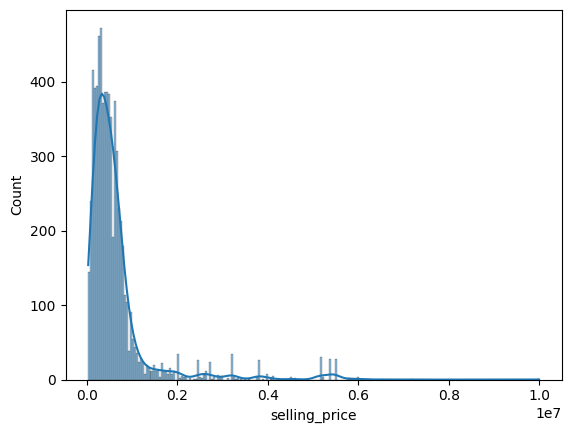

In [ ]:
sns.histplot(df['selling_price'], kde=True)
plt.show()

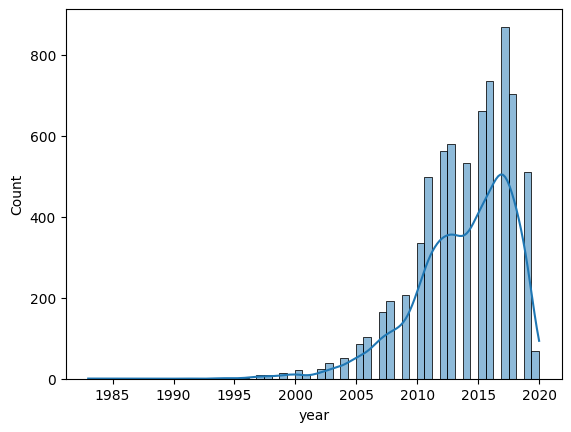

In [ ]:
sns.histplot(df['year'], kde=True)
plt.show()

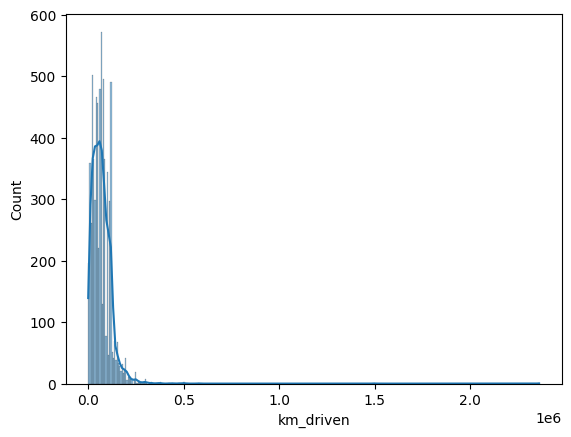

In [ ]:
sns.histplot(df['km_driven'], kde=True)
plt.show()



Построим матрицу корреляций для ответа на этот вопрос есть ли связь между показателями , взятыми выше (продажная цена, год выпуска, пробег автомобилей)

<Axes: >

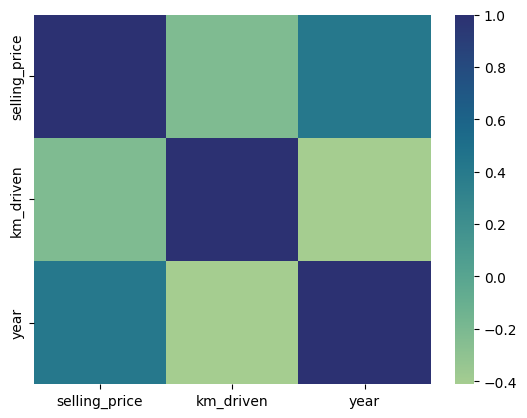

In [ ]:
corr = df[['selling_price','km_driven', 'year']].corr()

sns.heatmap(corr, cmap="crest")

ВЫВОД:
 * зависимость присутствует
 * между переменными цена и пробег наблюдается слабая корреляция, коэффициент которой близок к 0
 * между ценой и годом выпуска корреляция сильнее

### Заполнение пропусков на примере max_power

In [ ]:
df['max_power'].value_counts(dropna=False)

,count
max_power,
74 bhp,330
NaN,196
81.80 bhp,193
88.5 bhp,172
67 bhp,149
...,...
58.33 bhp,1
170.63 bhp,1
282 bhp,1


Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [ ]:
df['max_power'].value_counts(dropna=False, normalize=True)

,proportion
max_power,
74 bhp,0.047150
NaN,0.028004
81.80 bhp,0.027575
88.5 bhp,0.024575
67 bhp,0.021289
...,...
58.33 bhp,0.000143
170.63 bhp,0.000143
282 bhp,0.000143


Так как присутствует немного пропусков, заменим их на unknown

In [ ]:
df['max_power'].fillna("unknown", inplace=True)

df['max_power'].value_counts(dropna=False)

<ipython-input-15-2a06544b2b35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna("unknown", inplace=True)


,count
max_power,
74 bhp,330
unknown,196
81.80 bhp,193
88.5 bhp,172
67 bhp,149
...,...
58.33 bhp,1
170.63 bhp,1
282 bhp,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6999 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


ВЫВОД: пропуски значений max_power успешно заполнены

### transmission - тип трансмисии

Посмотрим, как влияет тип трансмисии (transmission) на цену автомобиля

In [ ]:
df['transmission'].value_counts()

,count
transmission,
Manual,6095
Automatic,904


Посмотрим как влияет тип трансмиссии на цену автомобиля

<ipython-input-20-bd32b8bc613d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')


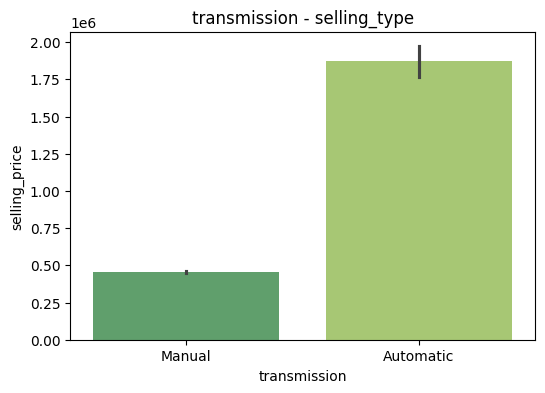

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')
plt.title('transmission - selling_type')
plt.show()

### fuel - вид топлива

Посмотрим, как влияет вид топлива (fuel) на цену автомобиля

In [ ]:
df['fuel'].value_counts()

,count
fuel,
Diesel,3793
Petrol,3120
CNG,52
LPG,34


<ipython-input-74-39e81e325e32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')


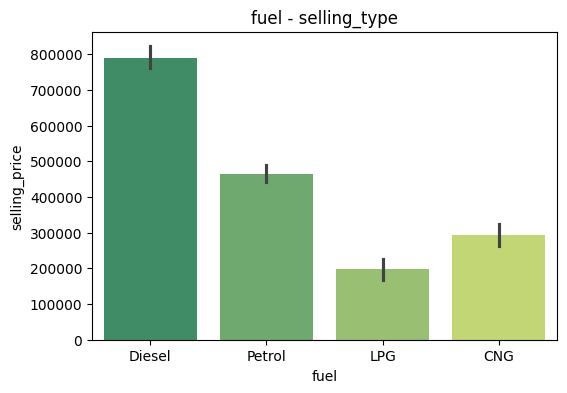

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')
plt.title('fuel - selling_type')
plt.show()

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на балл:

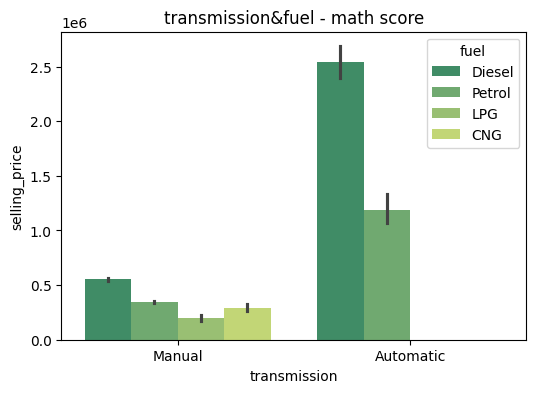

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='transmission', y='selling_price', hue='fuel', data = df, palette='summer')
plt.title('transmission&fuel - math score')
plt.show()

### Ящик с усами

Посмотрим на ящик с усами, отображающий распределение цен продажи автомобиля в зависимости от типа трансмиссии (transmission).

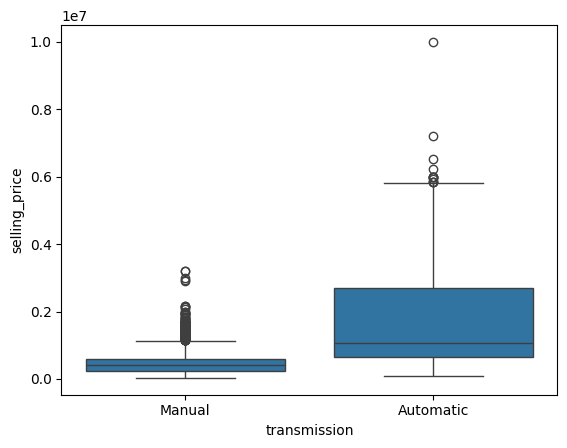

In [ ]:
sns.boxplot(x="transmission", y="selling_price", data=df)
plt.show()

## Бинаризация оценок

Будем считать, что машину не купят, если цена выше 500.000

In [ ]:
price = 500000

Создадим столбцы `car_price` где поставим:

* 1 - машину купят
* 0 - машину не купят

In [ ]:
df['car_price'] = df['selling_price'].apply(lambda x: 1 if x <= price else 0)

In [ ]:
df[['car_price','selling_price']].sample(10)

,car_price,selling_price
379,0,840000
3932,1,340000
1781,0,550000
3152,0,575000
1469,1,225000
5551,1,262000
5835,0,750000
538,1,196000
1187,0,570000
1829,1,350000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6999 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
 13  car_price      6999 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 765.6+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,seats,car_price
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000,6999.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008,0.569939
std,4.053095,8.089419e+05,5.772400e+04,0.965767,0.495120
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,0.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000,1.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,1.000000


ВЫВОД: получен дополнительный столбец car_price с ценами, выраженными в бинарных значениях

# Машинное обучение

## Предсказание покупки машины по transmission

In [ ]:
X = df.drop(['mileage', 'name', 'year', 'km_driven', 'seller_type', 'owner', 'engine', 'max_power', 'torque', 'seats', 'fuel', 'car_price'], axis=1)

y = df['car_price'] # целевая переменная (target)

In [ ]:
X.head(5)

,selling_price,transmission
0,450000,Manual
1,370000,Manual
2,225000,Manual
3,130000,Manual
4,440000,Manual


Переведем категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

Возьмем единственный бинарный признак "тип трансмиссии":

* `transmission`

Первую категорию Automatic заменим на 0, вторую Manual на 1

In [ ]:
X['transmission'] = X['transmission'].map({'Manual': 1, 'Automatic' : 0})

In [ ]:
X.head(5)

,selling_price,transmission
0,450000,1
1,370000,1
2,225000,1
3,130000,1
4,440000,1


In [ ]:
y[:10]

,car_price
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 2), (1750, 2))

Для решения нашей задачи будем использовать линейный классификатор под названием **логистическая регрессия**.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

По предсказанию из выборки 10 машин купят 8

In [ ]:
# y_test.value_counts(normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 724,    0],
       [   0, 1026]])

In [ ]:
# len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(pred[pred == 0])

In [ ]:
model.coef_

array([[-0.00408335, -0.11014098]])

ВЫВОД: согласно матрице ошибок модель верно предсказала 724 примера НЕ ПОКУПКИ машины (True Negative) и 1026 примеров ПОКУПКИ (True Positive)